In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sns

In [28]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips,drop_first=True)

In [29]:
tips.head(4)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True


In [30]:
X = tips.drop("tip",axis=1)
y = tips["tip"] 

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
X_test.head(2)

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
64,17.59,3,False,True,False,True,False,True
63,18.29,4,False,False,False,True,False,True


In [33]:
X_train.head(2)

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
7,26.88,4,False,True,False,False,True,True
83,32.68,2,False,False,False,False,False,False


## SCALE data in range 0 to 1

In [34]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from tensorflow import keras
from keras import models
from keras import layers

In [36]:
model  = models.Sequential([ 
    layers.Dense(64,activation="relu",input_shape=(X_train.shape[1],)),##input layer
    layers.Dense(32,activation="relu"),## hidden layer
    layers.Dense(1)  ##output llayer for regression
])
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

c:\Users\Rrs computers\miniconda3\envs\data_science\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.fit(X_train,y_train,epochs=15,verbose=1,batch_size=32)


Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.5688 - mae: 1.2228
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1060 - mae: 1.0953
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.4450 - mae: 0.9341
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4158 - mae: 0.9095
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3258 - mae: 0.9060
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.4560 - mae: 0.9056
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1783 - mae: 0.8116
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1005 - mae: 0.7932
Epoch 9/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2584 - mae: 0.8189
Epoch 10/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.1934 - mae: 0.8310
Epoch 11/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1517 - mae: 0.8261
Epoch 12/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1423 - mae: 0.8281
Epoch 13/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9

In [39]:
model.evaluate(X_test,y_test,batch_size=32)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 1.2001 - mae: 0.8670


[1.1594409942626953, 0.8399638533592224]

Epoch 1/20


c:\Users\Rrs computers\miniconda3\envs\data_science\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 11.5971 - mae: 3.1270 - val_loss: 10.5254 - val_mae: 2.9679
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.3102 - mae: 2.7847 - val_loss: 9.0475 - val_mae: 2.6971
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.4913 - mae: 2.5726 - val_loss: 7.7221 - val_mae: 2.4297
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 6.1846 - mae: 2.1704 - val_loss: 6.5061 - val_mae: 2.1777
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 5.9937 - mae: 2.0419 - val_loss: 5.3758 - val_mae: 1.9082
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.2696 - mae: 1.6456 - val_loss: 4.3956 - val_mae: 1.6688
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3.9730 - mae: 1.5618 - val_loss: 3.5539 - val_mae: 1.4742
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2.7558 - mae: 1.2577 - val_loss: 2.9070 - val_mae: 1.3450
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 2.5764 - mae: 1.1215 - val_loss

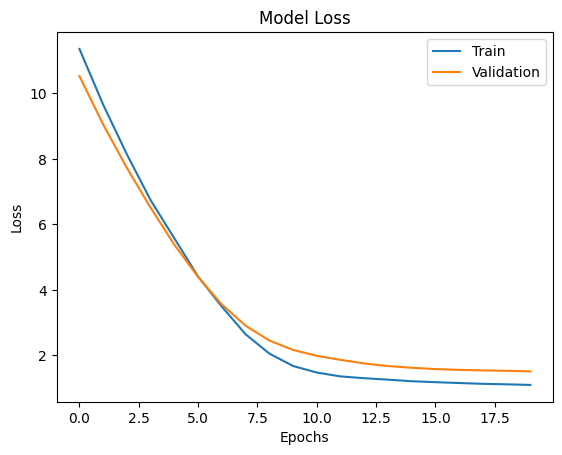

In [46]:
model  = models.Sequential([ 
    layers.Dense(64,activation="relu",input_shape=(X_train.shape[1],)),##input layer
    layers.Dense(32,activation="relu"),## hidden layer
    layers.Dense(1)  ##output llayer for regression
])
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])
history = model.fit(X_train,y_train,validation_split=0.2,epochs=20)

import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validation"],loc= "upper right")
plt.show()
